**K-MEANS AND HIERARCHICAL CLUSTERING ALGORITHMS THROUGH WHEAT GRAIN CLASSIFICATION**

Measurements of geometrical properties of kernels belonging to three different varieties of wheat.

Data has three different varieties of wheat: Kama, Rosa and Canadian.

To construct the data, seven geometric parameters (features) of wheat kernels were measured:

* area A,
* perimeter P,
* compactness C = 4*pi*A/P^2,
* length of kernel,
* width of kernel,
* asymmetry coefficient
* length of kernel groove.
* target (Kama, Rosa or Canadian)

In [204]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Seed_Data.csv']


**EDA:**

In [205]:
data = pd.read_csv('../input/Seed_Data.csv')
data.sample(5)

,A,P,C,LK,WK,A_Coef,LKG,target
81,18.72,16.19,0.8977,6.006,3.857,5.324,5.879,1
76,17.32,15.91,0.8599,6.064,3.403,3.824,5.922,1
97,18.98,16.57,0.8687,6.449,3.552,2.144,6.453,1
27,12.74,13.67,0.8564,5.395,2.956,2.504,4.869,0
183,11.65,13.07,0.8575,5.108,2.850,5.209,5.135,2


Let's see our data's information:

In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
A         210 non-null float64
P         210 non-null float64
C         210 non-null float64
LK        210 non-null float64
WK        210 non-null float64
A_Coef    210 non-null float64
LKG       210 non-null float64
target    210 non-null int64
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


We have 210 rows and 8 columns. There aren't any NaN value so we don't have to manipulate the missing values.
There is a column called target. That is our wheat's classification. Later I will exclude it from the data. Because my goal is to use sklearn clustering algorithms to classify different wheat types.

First of all I will have a look at my data features' statistics:

In [207]:
data.describe()

,A,P,C,LK,WK,A_Coef,LKG,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


And I want to see the correlations between the features:

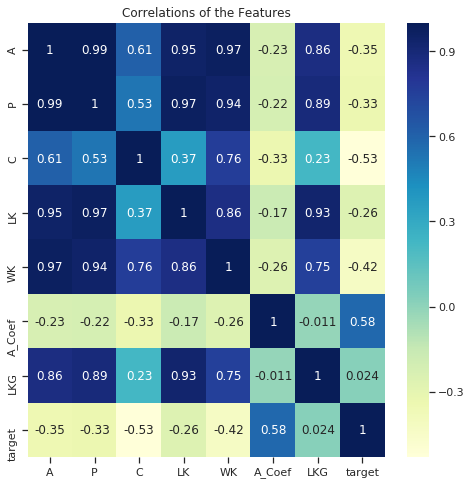

In [208]:
plt.figure(figsize=[8,8])
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.title('Correlations of the Features')
plt.show()

Let's see how many target classes we have in our data:

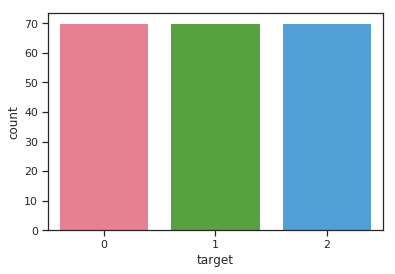

In [209]:
sns.countplot(data['target'], palette='husl')
plt.show()

So we have equally separeted 70 x 3 classes of wheat kernels in our data.

Let's visualize all the features using a pairplot:

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


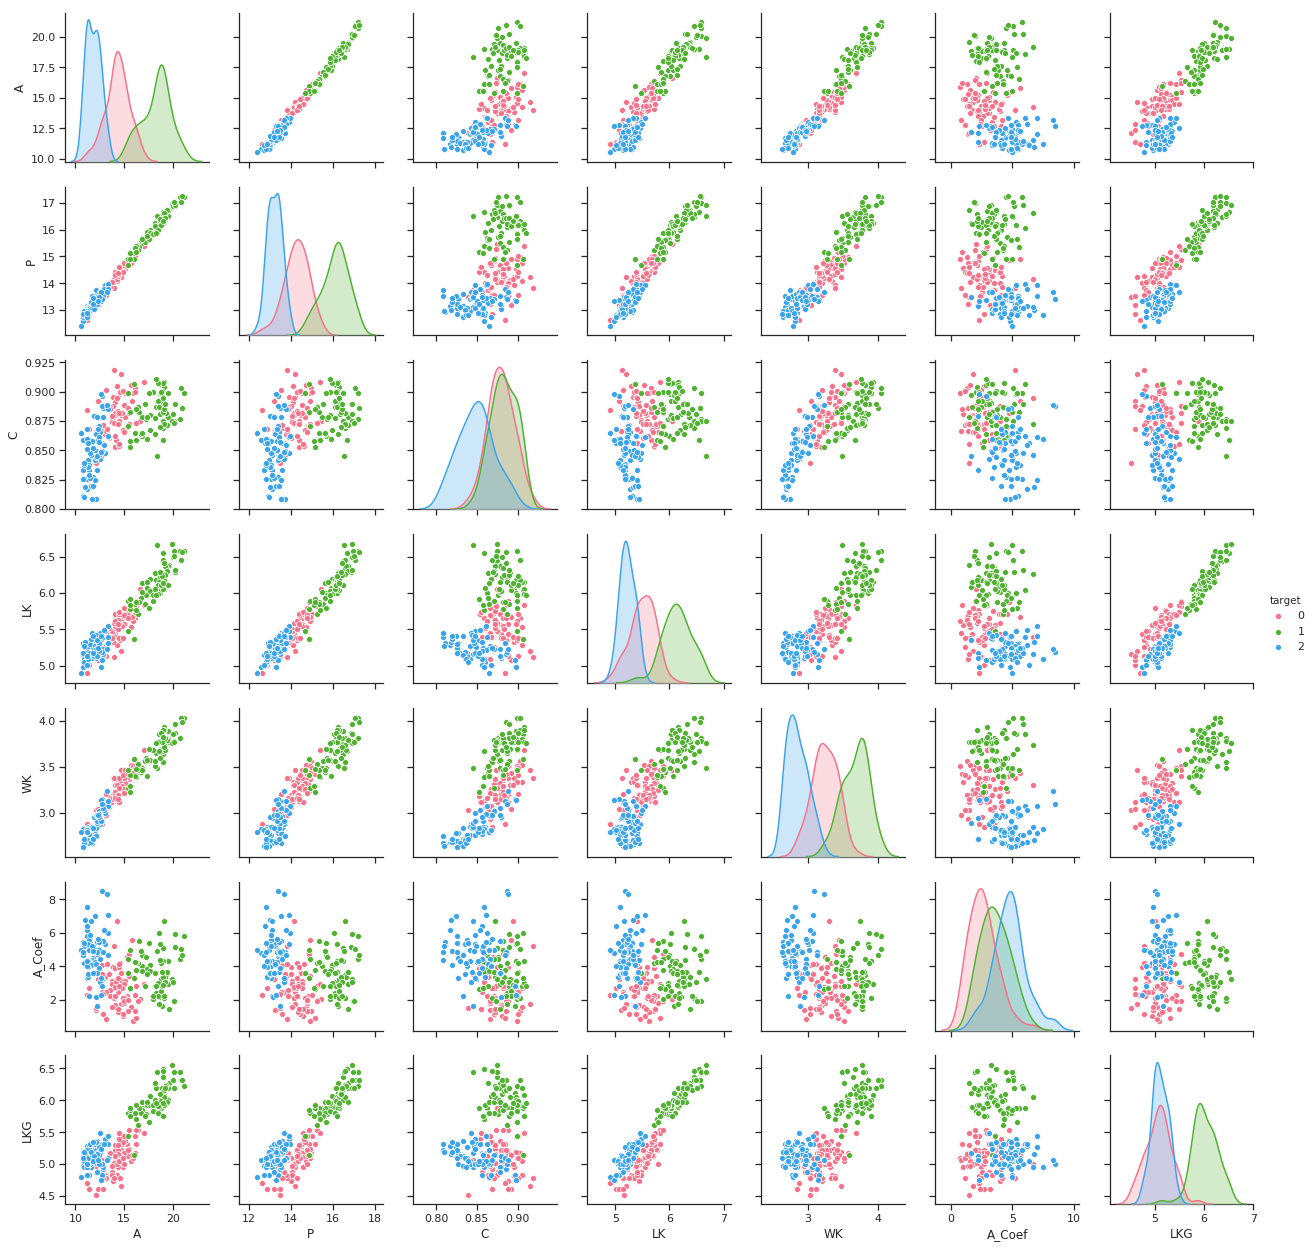

In [210]:
i = sns.pairplot(data, vars = ['A', 'P', 'C', 'LK', 'WK', 'A_Coef', 'LKG'] ,hue='target', palette='husl')
plt.show()

We can easily see the three target classes from our pairplot above.

Now I am going to visualize each feature. But in order to see the differences between the classes, I am going to show three boxplots for each feature. Each boxplot will show us the corresponding target class' values.

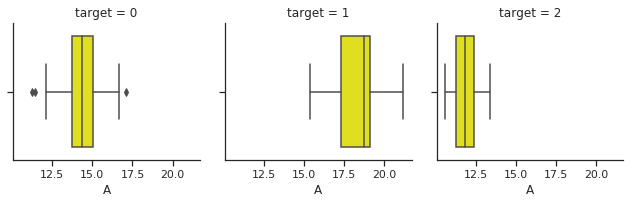

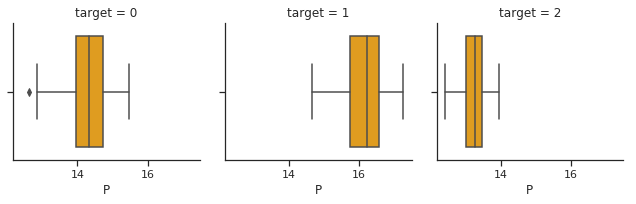

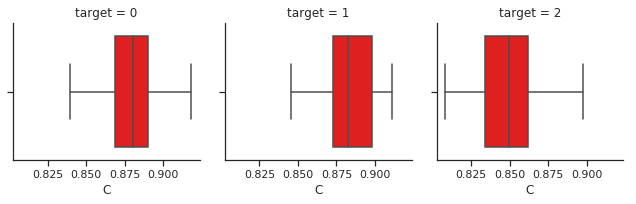

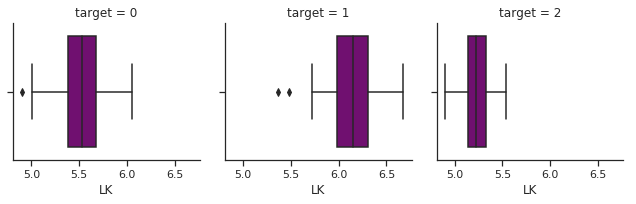

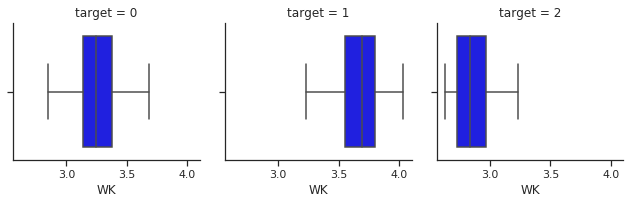

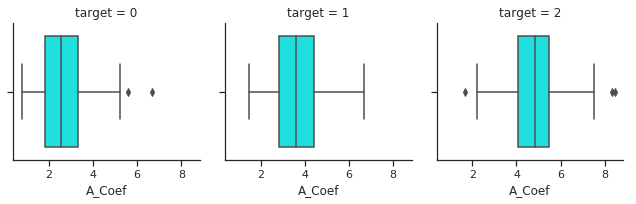

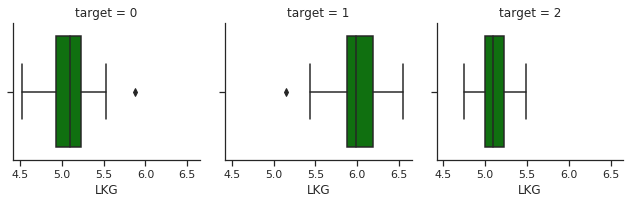

In [211]:
a = sns.FacetGrid(data, col='target')
a.map(sns.boxplot, 'A', color='yellow', order=['0', '1', '2'])

p = sns.FacetGrid(data, col='target')
p.map(sns.boxplot, 'P', color='orange', order=['0', '1', '2'])

c = sns.FacetGrid(data, col='target')
c.map(sns.boxplot, 'C', color='red', order=['0', '1', '2'])

lk = sns.FacetGrid(data, col='target')
lk.map(sns.boxplot, 'LK', color='purple', order=['0', '1', '2'])

wk = sns.FacetGrid(data, col='target')
wk.map(sns.boxplot, 'WK', color='blue', order=['0', '1', '2'])

acoef = sns.FacetGrid(data, col='target')
acoef.map(sns.boxplot, 'A_Coef', color='cyan', order=['0', '1', '2'])

lkg = sns.FacetGrid(data, col='target')
lkg.map(sns.boxplot, 'LKG', color='green', order=['0', '1', '2'])

As an example; from the graph above, we have three boxplots showing LKG feature values according to three classes. 
* If our wheat grain has a LKG value around 4.9-5.2 it belongs to target 0, 
* If it's around 5.9-6.2 it belongs to target 1, 
* And finally if it's around 5.0-5.3 it belongs to target 2.

**CREATING THE DATA SET:**

In [212]:
# Excluding target feature and create a new dataset:
df = data.iloc[:,0:7]
df.head(3)

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825


Now we are ready for creating our machine learning clustering algorithms. 

In this kernel I will use two methods; **k-means clustering** and **hierarchical clustering** algorithms.

For k-means clustering algorithm;
* First of all I will find the best k value.
* Than I will use this k value to create a k-means model.
* And I will compare my original and k-means clustered datas.

For hierarchical clustering algorithm;
* First I will apply a dendrogram in order to find how many classes do I have in my data.
* Than I will use this class number to apply a hierarchical clustering algorithm.
* Lastly I will compare my original, k-means and hierarchical clustered datas.


**K-MEANS CLUSTERING ALGORITHM:**

**Finding the best K value:**

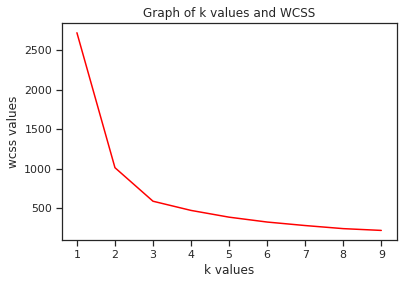

In [213]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.plot(range(1,10), wcss, color='red')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()

We already know that our data set has three classes. 

Bu if we didn't know how many classes we have in our data set, we sould use this method. 

And according to the graph; it's elbow (where it bends) is the best k value for our K Means algorithm.

**K-Means Clustering Algorithm:**

In [216]:
# Now we know our best k value is 3, I am creating a new kmeans model:
kmeans2 = KMeans(n_clusters=3)

# Training the model:
clusters = kmeans2.fit_predict(df)

# Adding a label feature with the predicted class values:
df_k = df.copy(deep=True)
df_k['label'] = clusters

**Comparing Original Classes and K-Means Algorithm Classes:**

For visualization I will use only two features (A and P) for the original and predicted datasets. Different classes will have seperate color and styles.

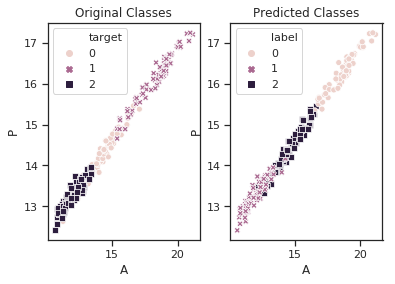

In [217]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1 = plt.subplot(1,2,1)
plt.title('Original Classes')
sns.scatterplot(x='A', y='P', hue='target', style='target', data=data, ax=ax1)

ax2 = plt.subplot(1,2,2)
plt.title('Predicted Classes')
sns.scatterplot(x='A', y='P', hue='label', style='label', data=df_k, ax=ax2)
plt.show()

In [218]:
print('Original Data Classes:')
print(data.target.value_counts())
print('-' * 30)
print('Predicted Data Classes:')
print(df_k.label.value_counts())

Original Data Classes:
2    70
1    70
0    70
Name: target, dtype: int64
------------------------------
Predicted Data Classes:
1    77
2    72
0    61
Name: label, dtype: int64


**HIERARCHICAL CLUSTERING ALGORITHM:**

**Creating the Dendrogram:**

We use dendrogram to find how many classes we have in our data set.

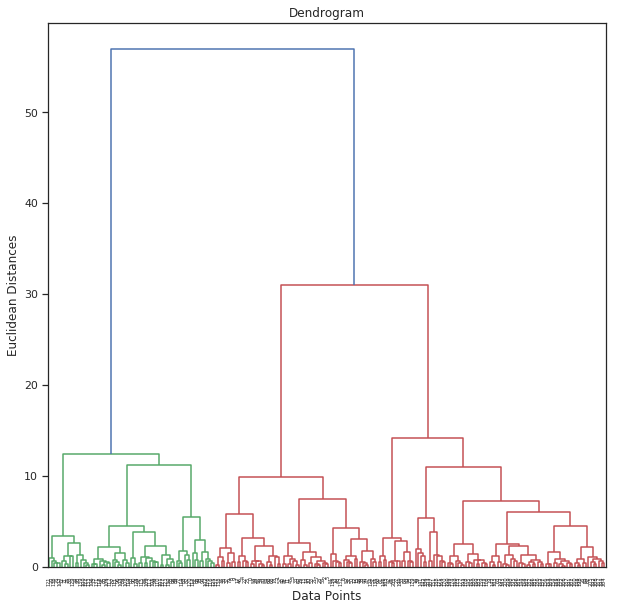

In [219]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=[10,10])
merg = linkage(df, method='ward')
dendrogram(merg, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

From the dendrogram we can read there are 3 classes in our data set.

**Hierarchical Clustering Algorithm:**

In [225]:
from sklearn.cluster import AgglomerativeClustering

hie_clus = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster2 = hie_clus.fit_predict(df)

df_h = df.copy(deep=True)
df_h['label'] = cluster2

**Comparing Original, K-Means and Hierarchical Clustered Classes:**

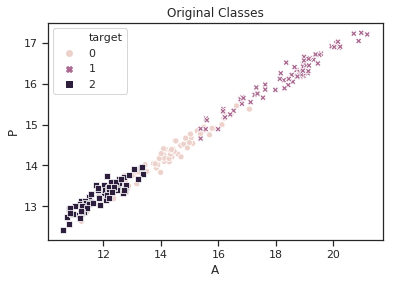

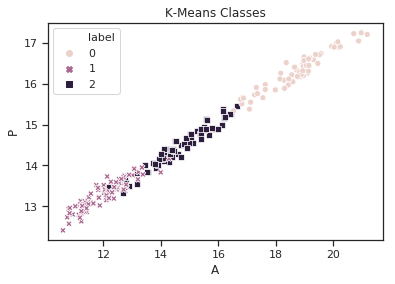

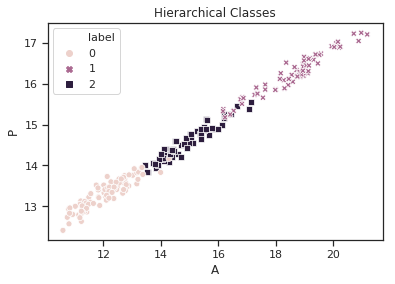

In [227]:
plt.title('Original Classes')
sns.scatterplot(x='A', y='P', hue='target', style='target', data=data)
plt.show()
plt.title('K-Means Classes')
sns.scatterplot(x='A', y='P', hue='label', style='label', data=df_k)
plt.show()
plt.title('Hierarchical Classes')
sns.scatterplot(x='A', y='P', hue='label', style='label', data=df_h)
plt.show()

In [228]:
print('Original Data Classes:')
print(data.target.value_counts())
print('-' * 30)
print('K-Means Predicted Data Classes:')
print(df_k.label.value_counts())
print('-' * 30)
print('Hierarchical Predicted Data Classes:')
print(df_h.label.value_counts())

Original Data Classes:
2    70
1    70
0    70
Name: target, dtype: int64
------------------------------
K-Means Predicted Data Classes:
1    77
2    72
0    61
Name: label, dtype: int64
------------------------------
Hierarchical Predicted Data Classes:
0    86
1    63
2    61
Name: label, dtype: int64


We can see our models' differences from the comparision of our algorithms' class counts.

Hope you enjoy my clustering example. If you have a better/quicker way or a suggestion please write a comment below.

And I would appreciate a lot if you up vote my kernel.